Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?

In machine learning, particularly in Support Vector Machines (SVM) and other kernel-based algorithms, polynomial functions can be used as kernel functions. Understanding the relationship between polynomial functions and kernel functions is crucial to understanding how machine learning models handle non-linear data.

Kernel functions enable algorithms to operate in a high-dimensional space without explicitly computing the coordinates of the data in that space. This technique is particularly useful in algorithms like SVMs, which aim to find a hyperplane that separates different classes of data points.

The kernel function K(xi,xj) computes the dot product of two vectors xi and xj in a transformed feature space without needing to perform the transformation ϕ(x) explicitly. This process is known as the kernel trick. A polynomial kernel is a specific type of kernel function used to compute the similarity between two data points in a high-dimensional space defined by a polynomial mapping. The polynomial kernel function is defined as:

                K(xi,xj)=(xi.xj+c)^d
                
where, xi and xj are the input vectors (feature vectors of the data points). c>=0 is a constant that can be used to trade off the influence of higher-order versus lower-order terms in the polynomial. d>=1 is the degree of the polynomial.

Polynomial kernel functions effectively map the original feature space to a higher-dimensional space where non-linear relationships between data points can be captured as linear relationships. For example, a polynomial kernel of degree 2 (quadratic kernel) will map two-dimensional data points to a space that includes squared terms and interaction terms, capturing quadratic relationships.

When using a polynomial kernel, there is no need to explicitly compute the transformed features (like squares or interaction terms) for each data point. The kernel trick allows the SVM to compute the dot product in the high-dimensional space directly through the polynomial function without the need to perform an explicit transformation. This significantly reduces computational complexity, especially for high-degree polynomials.

The polynomial kernel introduces non-linearity to the decision boundary of the model. By increasing the degree d of the polynomial, the model can learn more complex, non-linear decision boundaries. This is particularly useful when the data is not linearly separable in its original feature space.

The relationship between polynomial functions and kernel functions in machine learning is that polynomial functions can serve as kernel functions to enable algorithms like SVMs to handle non-linear data. The polynomial kernel function provides a method to compute the similarity between data points in a high-dimensional space without explicitly performing the transformation. This capability allows for the modeling of complex, non-linear relationships between features, improving the algorithm’s ability to classify data that is not linearly separable in the original feature space.

Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y= make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=5, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)



In [2]:
svm=SVC(kernel='poly',degree=3)
svm.fit(X_train,y_train)

SVC(kernel='poly')

In [3]:
y_pred=svm.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score,classification_report
acc=accuracy_score(y_test,y_test)
acc

1.0

In [5]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       112
           1       0.85      0.93      0.89        88

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



In [6]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
cf

array([[97, 15],
       [ 6, 82]])

<AxesSubplot: >

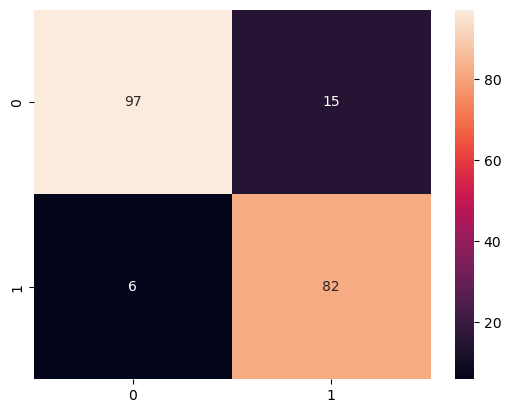

In [7]:
import seaborn as sns
sns.heatmap(data=cf, annot=True, fmt='d')

Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In SVR, ϵ defines a margin of tolerance within which no penalty is given to errors. In other words, it sets the width of the "epsilon-tube" around the regression line or hyperplane. Data points that fall within this tube are considered correctly predicted, and errors for these points are ignored. Points outside this tube contribute to the loss function, and they become support vectors because they influence the model's construction.

As you increase the value of ϵ, the width of the epsilon-tube around the regression line becomes wider. This means that more data points fall within this tube and are not penalized, as their errors are within the acceptable range. 

With a larger ϵ, more data points fall within the epsilon-tube, leading to fewer points lying outside of it. Since support vectors are defined as those points that lie outside the epsilon-tube (and therefore have non-zero error or margin violations), increasing ϵ decreases the number of support vectors. This is because fewer data points contribute to the construction of the model by lying outside the margin where they incur a loss.

However, if ϵ is too large, the model may underfit, as it becomes too insensitive to data points and variations, potentially ignoring important trends.

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?

The performance of Support Vector Regression (SVR) is highly dependent on the choice of several key parameters: the kernel function, C (regularization parameter), epsilon (ϵ) (the margin of tolerance), and gamma (γ) (kernel coefficient for certain types of kernels).

1. Kernel Function: It transforms the input data into a higher-dimensional feature space where a linear regression can be fit. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.
    - Linear Kernel:Best suited for linearly separable data or when the relationship between input features and the target variable is approximately linear. Used when the data is linearly related; increases model simplicity and reduces the risk of overfitting.
    - Polynomial Kernel: Useful for capturing polynomial relationships between features. The degree of the polynomial adds flexibility to the model.  Increase the degree when you suspect non-linear, polynomial relationships, but overfitting with high degrees should be taken care of.
    - RBF Kernel (Gaussian Kernel): Commonly used for non-linear relationships. It can model more complex, non-linear patterns in data. Use when data is non-linear. Adjust the γ parameter (see below) to control the width of the kernel and model complexity.
    - Sigmoid Kernel: Less commonly used in practice; sometimes similar in behavior to neural networks with certain parameters.
    
2. Regularization Parameter (C): The C parameter controls the trade-off between maximizing the margin and minimizing the error. A smaller C puts more emphasis on finding a wide margin, while a larger C puts more emphasis on minimizing the training error.
    - More value of C: The model will focus more on minimizing the error on training data, which can lead to a narrower margin and potentially overfitting. It tries to correctly predict as many training points as possible, even if it means using a more complex model. We increase the value of C when we are sure of The model will focus more on minimizing the error on training data, which can lead to a narrower margin and potentially overfitting. It tries to correctly predict as many training points as possible, even if it means using a more complex model.
    - Less value of C: The model allows some errors in training in exchange for a wider margin, which can improve generalization and reduce overfitting. When you want to make the model more robust to noise and improve its ability to generalize to unseen data (reduce variance). When we want to make the model more robust to noise and improve its ability to generalize to unseen data (reduce variance).
    
3. Epsilon (ϵ) Parameter: The ϵ parameter defines a margin of tolerance where no penalty is given to errors within this range. It essentially controls the width of the epsilon-tube around the regression line.
    - More value of ϵ: he model is less sensitive to small errors, leading to a wider margin. It focuses more on capturing the overall trend rather than fitting closely to every data point, which can help in reducing overfitting, especially in noisy data.
    - Less value of ϵ: The model tries to capture more fine-grained details of the data by allowing only small errors within the margin. This can be useful when the data is clean and the target function is complex.
    
4. Gamma (γ) Parameter: The γ parameter is used in non-linear kernels such as the RBF and polynomial kernels. It defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 
    - The decision boundary is more sensitive to individual data points. The model can fit more complex patterns, but it can also lead to overfitting if the value is too high because it captures noise as well.
    - The influence of individual points is more spread out, leading to a smoother decision boundary. This can improve generalization but may underfit if set too low, as it might not capture enough of the data’s structure.

Q5. Assignment:
- Import the necessary libraries and load the dataseg
- Split the dataset into training and testing setZ
- Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
- Create an instance of the SVC classifier and train it on the training datW
- hse the trained classifier to predict the labels of the testing datW
- Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
precision, recall, F1-scoreK
- Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
improve its performanc_
- Train the tuned classifier on the entire dataseg
- Save the trained classifier to a file for future use.

In [8]:
import pandas as pd
df=pd.read_csv('breast_cancer_wisconsin.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.shape

(569, 33)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df=df.drop(labels=['id','Unnamed: 32'],axis=1)

In [12]:
df.shape

(569, 31)

In [13]:
df['diagnosis']=df['diagnosis'].replace({'B':0,'M':1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## split the dataset into training and testing set

In [15]:
X=df.drop(labels=['diagnosis'],axis=1)
y=df[['diagnosis']]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

In [17]:
X_train.shape

(398, 30)

In [18]:
X_test.shape

(171, 30)

## Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [20]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.705820,1.049745,2.121295,1.669337,2.276458,4.544295,3.539139,2.848393,4.032390,2.639773,...,1.459510,0.949589,1.868176,1.306840,1.335383,2.313855,2.346427,2.049399,3.944281,0.866554
1,0.536388,-0.909945,0.569095,0.390316,-0.065868,0.644945,0.393543,0.557002,-0.116781,-0.401530,...,0.508294,-0.645315,0.501917,0.330087,0.477013,1.242091,1.052574,1.255850,0.167978,0.405242
2,-0.131456,-0.993336,-0.148848,-0.211543,-0.916169,-0.508574,-0.567530,-0.606645,-0.079867,-0.512454,...,-0.362451,-1.028485,-0.280415,-0.399387,-0.196219,0.368661,-0.080795,-0.140014,0.741988,0.687521
3,0.928077,1.418055,0.925405,0.828546,0.329734,0.223748,0.983188,0.443947,-1.866520,-0.555982,...,0.365921,0.351910,0.386082,0.243539,-0.330866,-0.464721,0.030311,-0.072253,-2.040715,-0.861167
4,0.144699,-0.972488,0.158315,-0.009697,1.205760,0.585041,0.137701,0.562858,1.116158,0.117991,...,0.008957,-1.257732,0.059367,-0.140450,-0.187804,0.359126,-0.064176,0.376471,0.373873,0.047726


In [21]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.113702,-0.022757,0.096063,0.012384,-0.832738,-0.461400,-0.004036,-0.491044,-1.257434,-0.724475,...,0.000703,0.404309,0.020756,-0.092937,-0.978852,0.079425,0.493724,-0.282461,-0.686799,-0.506946
1,-0.582321,-0.124679,-0.624337,-0.594570,-0.834128,-0.836920,-0.999032,-1.019701,-0.954736,-0.300434,...,-0.548155,0.186524,-0.619604,-0.566124,-0.137312,-0.745058,-1.086629,-0.960215,-0.048836,-0.166454
2,-1.794022,1.181780,-1.801388,-1.342789,-3.005421,-1.104989,-1.091673,-1.235829,-0.836610,-0.530708,...,-1.411472,0.728530,-1.432825,-1.085410,-1.775790,-1.194868,-1.300578,-1.727112,-0.062875,-0.739798
3,-0.869748,-0.604178,-0.859420,-0.798682,0.823368,-0.460651,-0.715928,-0.604353,-0.367798,0.109566,...,-0.801951,0.085001,-0.815929,-0.727209,0.199304,-0.662419,-0.793957,-0.608162,0.135222,-0.277388
4,-0.387886,-0.634291,-0.384750,-0.457270,1.157092,0.169460,-0.613048,-0.473220,1.130923,0.506930,...,-0.381022,-0.684614,-0.409022,-0.457498,0.645321,-0.346484,-0.624925,-0.515707,0.249088,0.093857


In [22]:
import pickle
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,file=f)

## Create an instance of the SVC classifier and train it on the training data

In [23]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,y_train.values.flatten())

SVC(kernel='linear')

## Use the trained classifier to predict the labels of the testing data

In [24]:
y_pred=svm.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

## Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-scoreK

<AxesSubplot: >

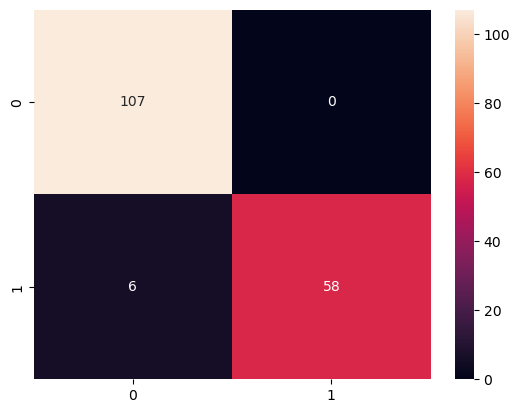

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(data=cf, annot=True,fmt='d')

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



## Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to improve its performance

In [28]:
parameters = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear']
}

In [29]:
from sklearn.model_selection import GridSearchCV
gsv=GridSearchCV(SVC(), param_grid=parameters,cv=5,scoring='f1', refit=True, verbose=3)
gsv.fit(X_train,y_train.values.flatten())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.906 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.906 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='f1', verbose=3)

In [30]:
gsv.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [31]:
gsv.best_score_

0.9536566071398516

In [32]:
best_svc=gsv.best_estimator_

In [33]:
y_pred_best=best_svc.predict(X_test)

In [34]:
cf_best=confusion_matrix(y_test,y_pred_best)

<AxesSubplot: >

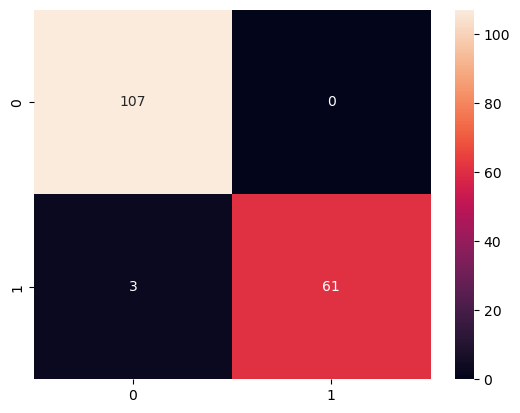

In [35]:
sns.heatmap(data=cf_best,annot=True, fmt='d')

In [36]:
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Model Test F1 score imporved from 0.96 to 0.98 on test data

## Train the tuned classifier on the entire dataseg

In [37]:
final_svc = SVC(kernel='linear',C=0.1,gamma=1)
final_svc.fit(X,y.values.flatten())

SVC(C=0.1, gamma=1, kernel='linear')

In [38]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(final_svc,file=f)

### Pickle file links
1. [scaler.pkl](scaler.pkl)
2. [model.pkl](model.pkl)